In [1]:
# f(x) = 500 -20x1 - 26x2 -4x1x2 + 4x1^2 + 3x2^2

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [54]:
c = 0.8
iterations = 2


In [61]:
# Define the shape of the array
rows, cols = 2, 4

# Create a 2D array with custom ranges
temp = np.zeros((rows, cols))

# Initialize each row with the specified range
temp[0, :] = np.random.uniform(-2, 10, cols)  # First row: -2 < x < 10
temp[1, :] = np.random.uniform(-1, 11, cols)  # Second row: -1 < y < 11

In [62]:
print(temp)

[[ 8.11991646  6.80574835  7.00262303 -1.66299396]
 [ 8.75481537  0.98800993  7.88260775 -0.56439833]]


Points:  [0.4832907614220123, 7.455980278289966]
Points:  [-0.5542597236314732, 0.30211621500525965]
Points:  [-0.44704406734138047, 6.084946250504048]
Points:  [-2.92774407149008, 1.0000401745355365]
Points:  [1.6718603123674693, 4.909234546476061]
Points:  [-0.6968661051379226, -0.5072420339308148]
Points:  [-1.9061425535915293, -0.9932016724173011]
Points:  [-1.9979956983292175, -0.9987731980202192]
Points:  [3.413074481095337, 1.617375824725813]
Points:  [-0.6042664341832023, -0.5953156616638244]
Points:  [-1.796980021533189, -0.932171581261736]
Points:  [-1.9501972913629722, -0.9838934198004861]
Points:  [-1.9789547248681851, -0.9967478747045607]
Points:  [-0.5702633417677792, 5.646303068838946]
Points:  [-1.8269355006027628, 0.19596410378166151]
Points:  [1.0718798899325441, 0.6499060454893486]
Points:  [-1.610986332329136, -0.3187793967567347]
Points:  [-1.901999498385259, -0.4513354314149173]
Points:  [-1.9591609695220535, -0.8207152314642209]
Points:  [-1.977215290206708, -0.9

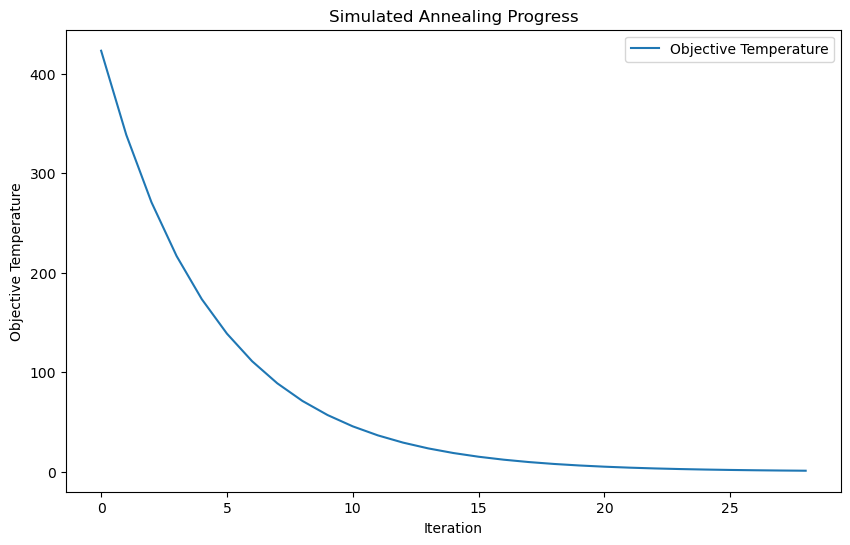

In [84]:
temperatures = sa(cols, iterations)
print("Initial temp: ", temperatures[0])
print("Global best temp: ",min(temperatures))
plt.figure(figsize=(10, 6))
plt.plot(temperatures, label="Objective Temperature")
plt.xlabel("Iteration")
plt.ylabel("Objective Temperature")
plt.title("Simulated Annealing Progress")
plt.legend()
plt.show()

In [81]:
def sa(cols, iterations):
    global_best = []
    
    # Extract the rows x1 and x2 from the temp array
    x1 = list(temp[0, :])
    x2 = list(temp[1, :])
    init_temp = initial_fitness_function(x1, x2)
    start_temp = sum(init_temp) / cols
    # print("Initial temp points: ", init_temp)
    # print("Start temp: ", start_temp)
    c = 0.8
    global_best.append(start_temp)
    dp = objective_fun(10, 11)
    objective_temp = fitness_function(dp)
    count = 0
    while(start_temp >= 1):
        print("Points: ", dp)
        start_temp, dp, objective_temp = iterate(iterations, dp, start_temp, objective_temp, c)    
        global_best.append(start_temp)
        count += 1
    print(count)
        

    # Return the final best solution found
    return global_best


In [73]:
def iterate(iterations, dp, start_temp, objective_temp, c):
   
    for _ in range(iterations):
        # print(dp)
        dp = objective_fun(dp[0], dp[1])
        # objective_temp = fitness_function(dp)
        u1 = random_numbers()
        u2 = random_numbers()
        variants, k = new_varitions(dp, accuracy=6.0)
        points = new_points(u1, u2, variants, k)
        new_temp = fitness_function(points)
        # print("Objective temp: ", objective_temp)
        # print("New temp: ", new_temp)
        temp_difference = new_temp - objective_temp
        # print("Temp Difference: ", temp_difference)
        if temp_difference > 0:
            # Apply Metropolis criterion for accepting worse solutions
            if metropolis(temp_difference, start_temp) == 1:
                objective_temp = new_temp
                dp = points
        else :

            # Apply temperature cooling
            dp = points
            # print(".................")
            objective_temp = new_temp
    start_temp *= c
    return start_temp, dp, objective_temp
        

In [13]:
def metropolis(temp_difference, start_temp):
    r = random_numbers()
    delta = 2.718
    K = 1
    power = (temp_difference/start_temp)* (-1)
    value = delta**power
    if value > r:
        # print("Metropolis successed")
        return 1
    # print("Metropolis failed")
    return 0


In [14]:
def new_points(u1, u2, variants, dp):
    points = []
    points.append(dp[0] + u1*(variants[0]))
    points.append(dp[1] + u2*(variants[1]))
    return points

In [15]:
def new_varitions(dp, accuracy):
    variants = []
    k = []
    for value in dp:
        # print(value)
        r1 = value - accuracy
        k.append(r1)
        r2 = value + accuracy
        variants.append(r2 - r1)

    return variants, k

In [16]:
def initial_fitness_function(x1, x2):
    fitness = []
    
    # Loop while both x1 and x2 have elements
    while x1 and x2:
        x = x1.pop()
        y = x2.pop()
        fitness.append(500 - 20*x - 26*y - 4*x*y + 4*(x**2) + 3*(y**2))
    
    return fitness

In [17]:
def fitness_function(dp):
    
    fitness = 500 - 20*dp[0] - 26*dp[1] - 4*dp[0]*dp[1] + 4*(dp[0]**2) + 3*(dp[1]**2)
    return fitness

In [18]:
def random_numbers():
    random_num = random.uniform(0, 1)
    return random_num

In [19]:
def objective_fun(x, y):
    my_list = []
    my_list.append(random.uniform(-2, x))  # Add a random float between -2 and 10
    my_list.append(random.uniform(-1, y))  # Add a random float between -1 and 11
    return my_list